In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Был выбран датасет [fashionmnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

#Подготовка датасета

In [53]:
df = pd.read_csv('fashion-mnist_test.csv')
df.shape


(10000, 785)

#EDA

In [54]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [56]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [57]:
df.duplicated().sum()

1

In [58]:

df.drop_duplicates(inplace=True)
print(df.shape)

(9999, 785)


In [59]:
X = df.drop(['label'], axis=1)
y = df['label'] 
     

#PCA

In [60]:
y.unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

In [61]:
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [62]:

from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X)
X_pca = pca.transform(X)


Text(0.5, 1.0, 'PCA two-dimensional projection')

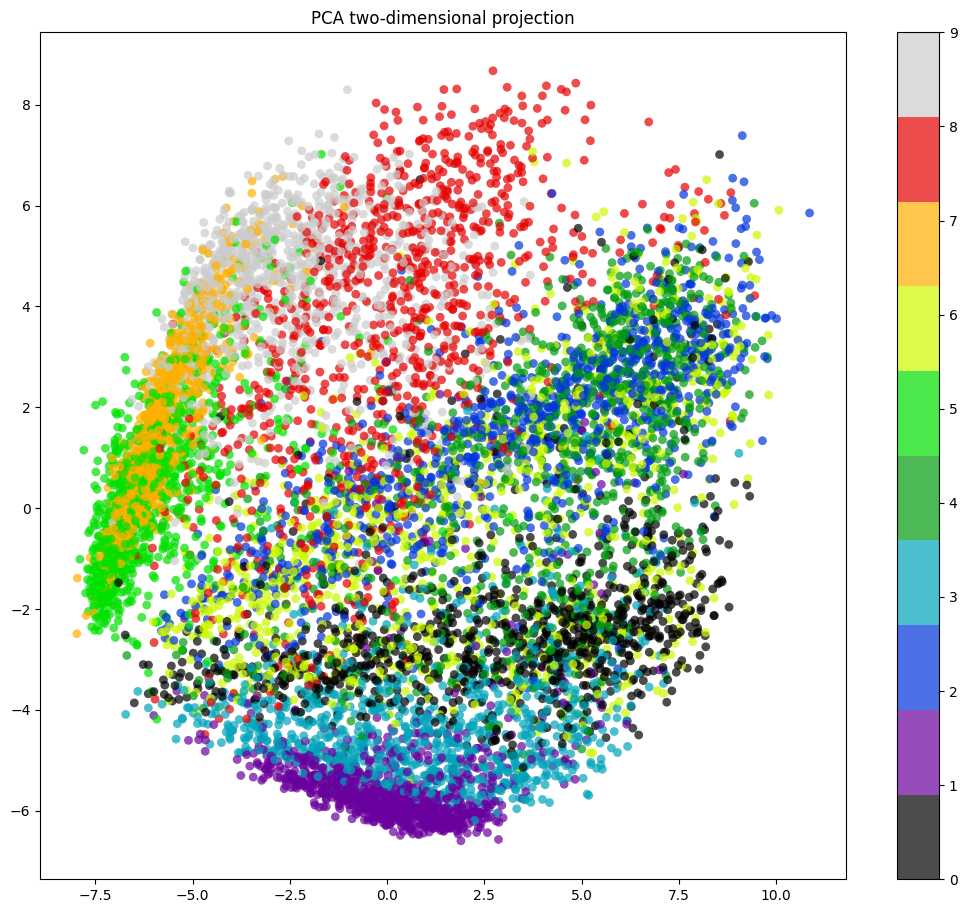

In [63]:
plt.figure(figsize=(13, 11))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title("PCA two-dimensional projection")

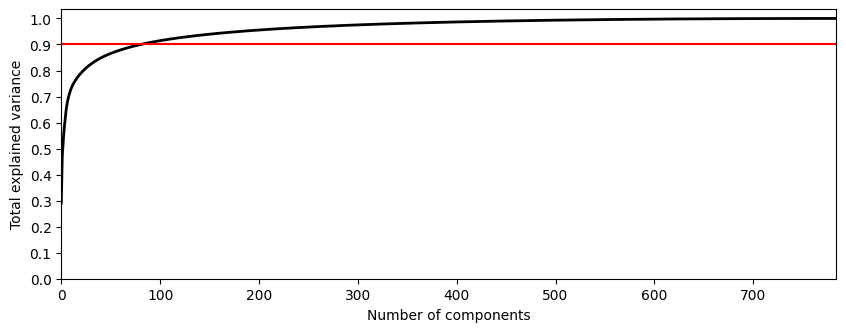

In [64]:
pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 28 * 28)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')


#t-SNE


Text(0.5, 1.0, 't-SNE two-dimensional projection')

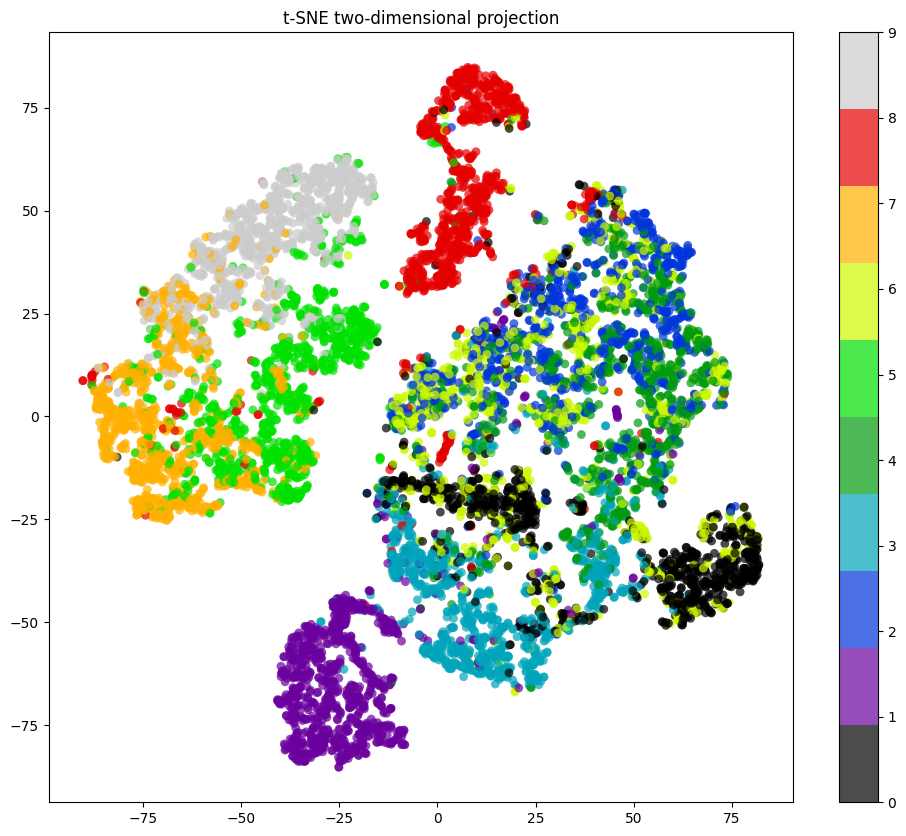

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE two-dimensional projection")

#Custom K-Mean

In [66]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted

class CustomKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=10, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def _get_labels(self, x):
        return np.argmin(
            np.linalg.norm(x[..., None] - self.cluster_centers_.T, axis=1),
            axis=1,
        )

    def predict(self, x):
        check_is_fitted(self)
        return self._get_labels(check_array(x))

    def fit(self, x, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]

        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]

        max_shift = np.inf
        while max_shift > self.tol:
            self.labels_ = self._get_labels(x)
            new_centers = np.empty((self.n_clusters, self.n_features_in_))
            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(x[self.labels_ == label], axis=0)

            max_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))
            self.cluster_centers_ = new_centers

        return self

     

In [67]:
xs = [PCA(n_components=i).fit_transform(X) for i in [25, 80, 300, 500]] + [X]

In [68]:
import itertools, time
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.base import clone

def train(est, params):
    params_combs = [
        dict(param) for param in
        itertools.product(*([(name, v) for v in vs] for (name, vs) in params.items()))
    ]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for param in params_combs:
            e = clone(est).set_params(**param)
            start_time = time.perf_counter()
            pred = e.fit_predict(x)
            pred_time = (time.perf_counter() - start_time)

            ari = adjusted_rand_score(y, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, pred_time, param

            ami = adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, pred_time, param

            fmi = fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, pred_time, param

        res = {
            "cluster": est.__class__.__name__,
            "dimension": x.shape[1],
            "mean fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
            "best ari": best_ari[0],
            "best ami": best_ami[0],
            "best fmi": best_fmi[0]
        }

        print(res)
        results.append(res)

    return results
     


In [69]:
custom_k_means = train(CustomKMeans(n_clusters=10, random_state=123), params={})

{'cluster': 'CustomKMeans', 'dimension': 25, 'mean fit predict time, s': 0.6520771139998942, 'best ari': 0.34223103813704836, 'best ami': 0.5070953809991527, 'best fmi': 0.41506478401506414}
{'cluster': 'CustomKMeans', 'dimension': 80, 'mean fit predict time, s': 1.7814099209999767, 'best ari': 0.342678420473039, 'best ami': 0.5077366222152723, 'best fmi': 0.41548276246013605}
{'cluster': 'CustomKMeans', 'dimension': 300, 'mean fit predict time, s': 7.16583865199982, 'best ari': 0.3432365104409154, 'best ami': 0.5084586007556177, 'best fmi': 0.416001178602673}
{'cluster': 'CustomKMeans', 'dimension': 500, 'mean fit predict time, s': 11.317392271000244, 'best ari': 0.3432365104409154, 'best ami': 0.5084586007556177, 'best fmi': 0.416001178602673}
{'cluster': 'CustomKMeans', 'dimension': 784, 'mean fit predict time, s': 20.110519812999883, 'best ari': 0.3432365104409154, 'best ami': 0.5084586007556177, 'best fmi': 0.416001178602673}


In [70]:
from sklearn.cluster import KMeans

k_mean = train(
    KMeans(n_clusters=10, n_init='auto', random_state=0),
    params={"algorithm": ["lloyd", "elkan"]}
)

{'cluster': 'KMeans', 'dimension': 25, 'mean fit predict time, s': 0.11617993400022897, 'best ari': 0.3767733996663977, 'best ami': 0.5117418745076369, 'best fmi': 0.44137169914078817}
{'cluster': 'KMeans', 'dimension': 80, 'mean fit predict time, s': 0.2423217159998785, 'best ari': 0.34246696957367323, 'best ami': 0.5075799272829411, 'best fmi': 0.4152893615909171}
{'cluster': 'KMeans', 'dimension': 300, 'mean fit predict time, s': 0.4328521060001549, 'best ari': 0.3753065467118412, 'best ami': 0.521853545469633, 'best fmi': 0.4434394276554953}
{'cluster': 'KMeans', 'dimension': 500, 'mean fit predict time, s': 0.7758730970003853, 'best ari': 0.3351999108641066, 'best ami': 0.4883716959096392, 'best fmi': 0.4052414420633441}
{'cluster': 'KMeans', 'dimension': 784, 'mean fit predict time, s': 0.7457479689996944, 'best ari': 0.3413906093070376, 'best ami': 0.5001994472509401, 'best fmi': 0.41194427679154455}


In [71]:
from sklearn.cluster import DBSCAN

dbscan = train(
    DBSCAN(n_jobs=4),
    params={
        "eps": [500, 600, 700],
        "min_samples": [40, 80, 120]
    }
)

{'cluster': 'DBSCAN', 'dimension': 25, 'mean fit predict time, s': 2.531362339000225, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.31608541725157124}
{'cluster': 'DBSCAN', 'dimension': 80, 'mean fit predict time, s': 3.1786885839997012, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.31608541725157124}
{'cluster': 'DBSCAN', 'dimension': 300, 'mean fit predict time, s': 2.9880594049996034, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.31608541725157124}
{'cluster': 'DBSCAN', 'dimension': 500, 'mean fit predict time, s': 3.9243157129999418, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.31608541725157124}
{'cluster': 'DBSCAN', 'dimension': 784, 'mean fit predict time, s': 5.977188136999757, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.31608541725157124}


In [72]:
results = pd.DataFrame(custom_k_means + k_mean + dbscan)

#Результаты

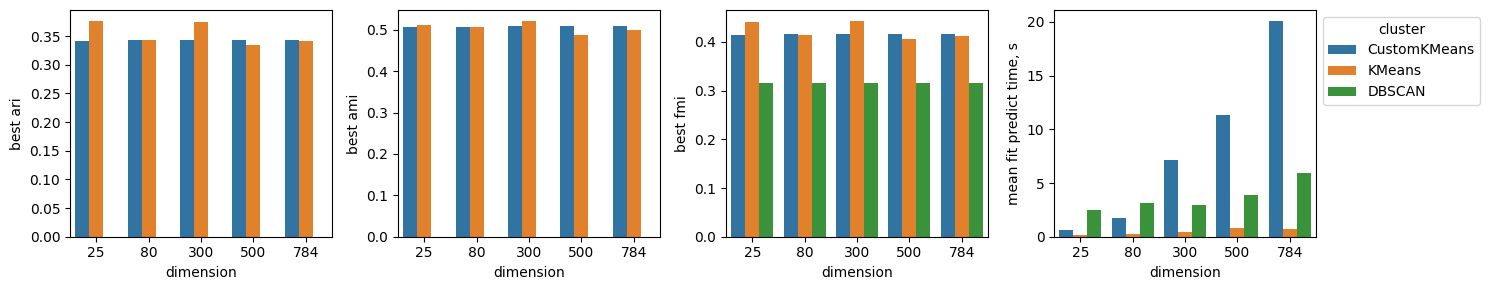

In [73]:

import seaborn as sns

fig, axs = plt.subplots(ncols=4, figsize=(15, 3))

for metric, ax in zip(["best ari", "best ami", "best fmi", "mean fit predict time, s"], axs.flatten()):
    sns.barplot(results, x="dimension", y=metric, hue="cluster", ax=ax)
    if metric == "mean fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()

*   KMeans обучается быстрее CustomKMeans и DBSCAN 
*   Уменьшение размерности данных не сильно повлияло сказалось на качество предсказаний.
*   На выбранном датасете худший результата показала модель DBSCAN


